### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import eda_helper_functions
import missingno as msno
%matplotlib inline
from sklearn.ensemble import IsolationForest

### 2. Read the Training Data

In [2]:
file_path = r"Z:\AIML Projects\sagemaker-flight-prices-prediction\data\train.csv"

training_data = pd.read_csv(file_path)
training_data

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-06,Kolkata,Banglore,08:25:00,04:40:00,1215,1.0,In-flight meal not included,8586
1,Jet Airways,2019-06-09,Kolkata,Banglore,21:10:00,09:20:00,730,1.0,In-flight meal not included,11841
2,Jet Airways,2019-05-21,New Delhi,Cochin,21:50:00,04:25:00,395,1.0,No Info,16079
3,Jet Airways,2019-03-18,Banglore,New Delhi,05:45:00,18:25:00,760,1.0,No Info,12284
4,Multiple Carriers,2019-05-27,New Delhi,Cochin,07:10:00,22:30:00,920,1.0,No Info,7878
...,...,...,...,...,...,...,...,...,...,...
635,Multiple Carriers,2019-03-27,New Delhi,Cochin,07:00:00,21:00:00,840,1.0,No Info,6358
636,Air Asia,2019-03-18,Kolkata,Banglore,10:20:00,12:55:00,155,0.0,No Info,4384
637,Indigo,2019-05-01,Kolkata,Banglore,15:15:00,20:05:00,290,1.0,No Info,4775
638,Indigo,2019-05-01,Chennai,Kolkata,11:35:00,14:00:00,145,0.0,No Info,4332


In [3]:
training_data.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [4]:
t_data = training_data.assign(**{
    col: pd.to_datetime(training_data.loc[:,col],dayfirst=True,format='mixed')
    for col in ["date_of_journey","dep_time","arrival_time"]
})
t_data

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-06,Kolkata,Banglore,2025-04-09 08:25:00,2025-04-09 04:40:00,1215,1.0,In-flight meal not included,8586
1,Jet Airways,2019-06-09,Kolkata,Banglore,2025-04-09 21:10:00,2025-04-09 09:20:00,730,1.0,In-flight meal not included,11841
2,Jet Airways,2019-05-21,New Delhi,Cochin,2025-04-09 21:50:00,2025-04-09 04:25:00,395,1.0,No Info,16079
3,Jet Airways,2019-03-18,Banglore,New Delhi,2025-04-09 05:45:00,2025-04-09 18:25:00,760,1.0,No Info,12284
4,Multiple Carriers,2019-05-27,New Delhi,Cochin,2025-04-09 07:10:00,2025-04-09 22:30:00,920,1.0,No Info,7878
...,...,...,...,...,...,...,...,...,...,...
635,Multiple Carriers,2019-03-27,New Delhi,Cochin,2025-04-09 07:00:00,2025-04-09 21:00:00,840,1.0,No Info,6358
636,Air Asia,2019-03-18,Kolkata,Banglore,2025-04-09 10:20:00,2025-04-09 12:55:00,155,0.0,No Info,4384
637,Indigo,2019-05-01,Kolkata,Banglore,2025-04-09 15:15:00,2025-04-09 20:05:00,290,1.0,No Info,4775
638,Indigo,2019-05-01,Chennai,Kolkata,2025-04-09 11:35:00,2025-04-09 14:00:00,145,0.0,No Info,4332


In [5]:
t_data.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

### 3. High-Level Summary of Data

In [6]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [7]:
t_data.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,645.015625,0.771875,9184.256250
std,517.160221,0.616281,4690.759895
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5403.000000
50%,497.500000,1.000000,8388.500000
75%,951.250000,1.000000,12284.000000
max,2420.000000,2.000000,46490.000000


In [8]:
(
    t_data
    .assign(total_stops=training_data["total_stops"].astype(object))
    .describe(include = "O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,5,3.0,4
top,Jet Airways,New Delhi,Cochin,1.0,No Info
freq,237,264,264,364.0,511


### 4. High-Level analysis of Missing Values

In [9]:
eda_helper_functions.missing_info(t_data)

,count,percentage
variable,,


if you don't want to see the data or tabular look you visualize it with a graph too.

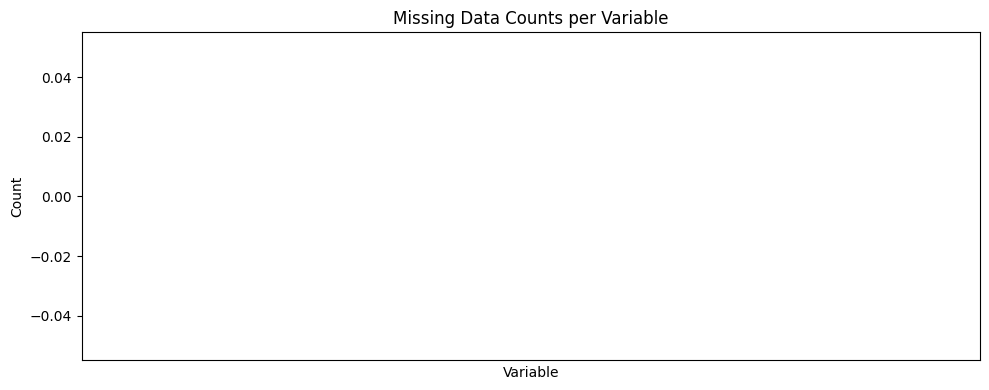

In [10]:
eda_helper_functions.plot_missing_info(t_data)

<Axes: >

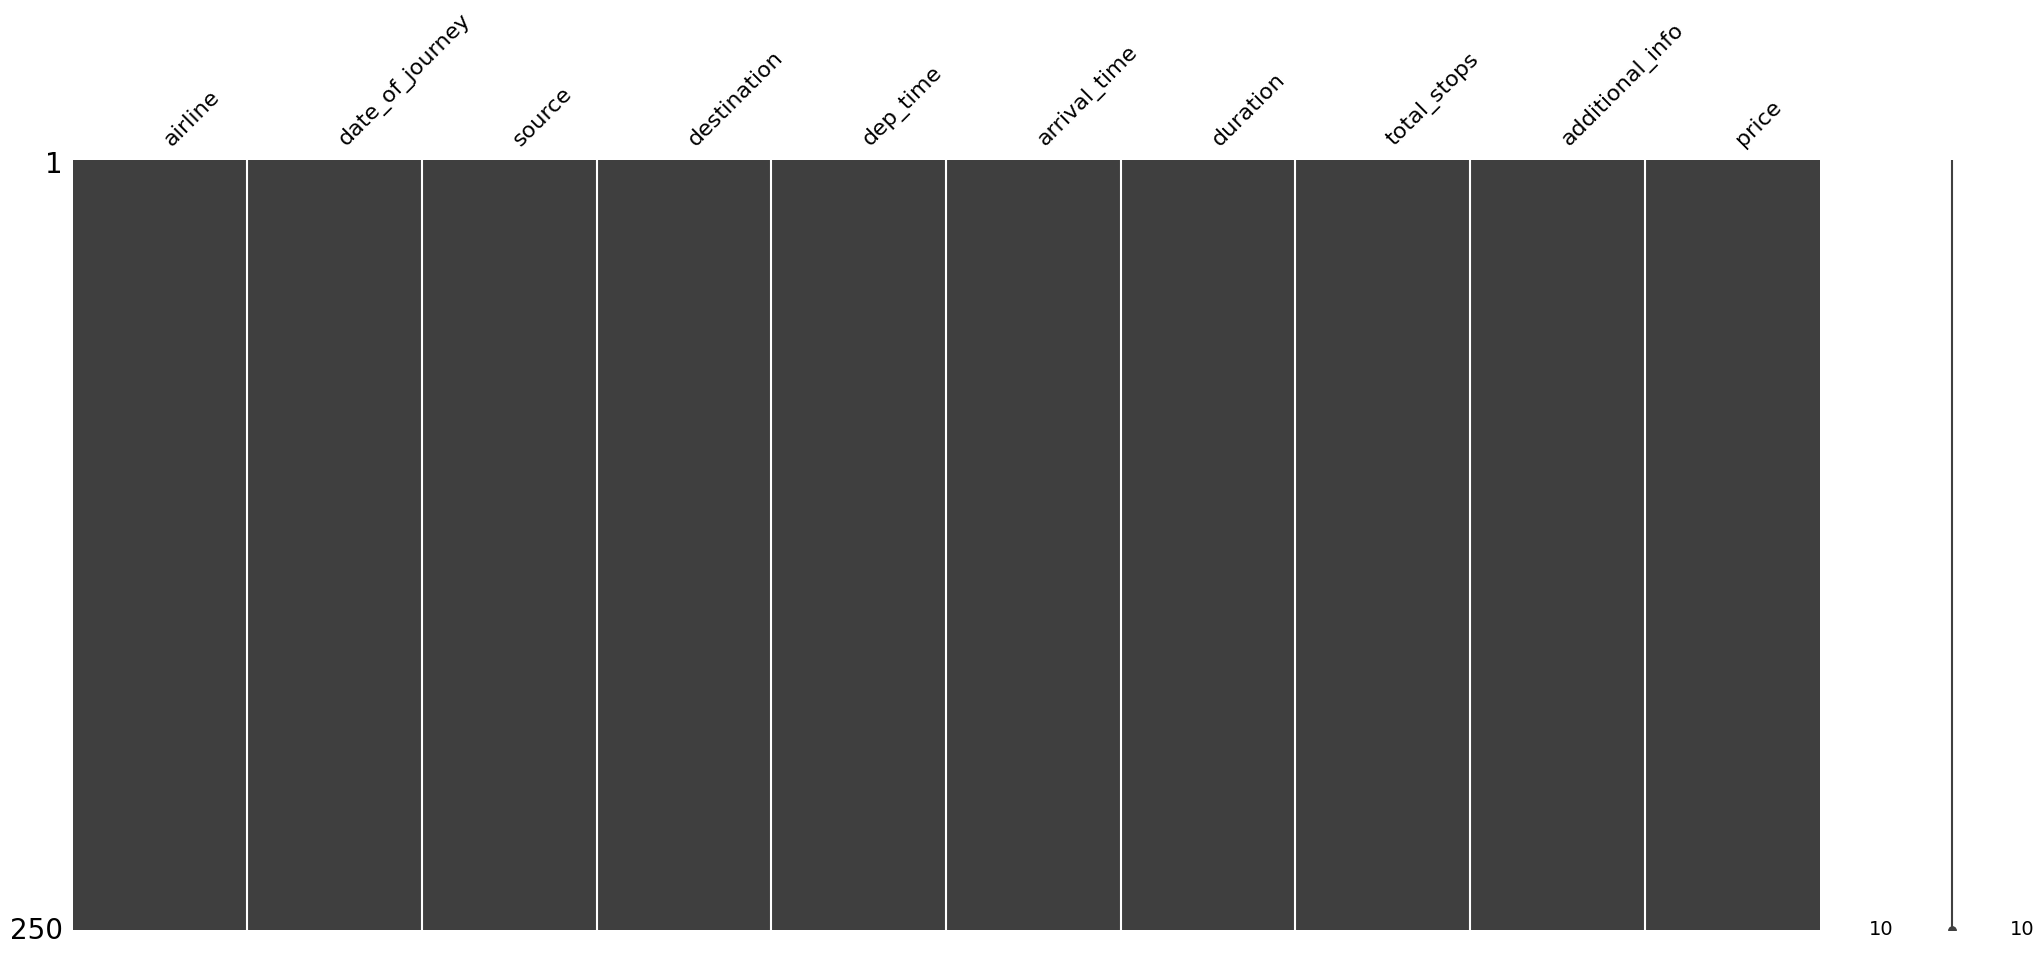

In [11]:
msno.matrix(t_data.sample(250))

this means all good so far, amazing way of viz 

In [12]:
# msno.dendrogram(training_data)

### 5. High-level analysis of Outliers

In [13]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [14]:
(
    t_data
    .assign(outlier=forest.fit_predict(
        training_data
        .drop(columns="price")
        .select_dtypes(include="number")
        
    ))
    .query("outlier == -1")
    # .duration
    # .describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Jet Airways,2019-06-06,Kolkata,Banglore,2025-04-09 08:25:00,2025-04-09 04:40:00,1215,1.0,In-flight meal not included,8586,-1
10,Air India,2019-05-15,New Delhi,Cochin,2025-04-09 09:45:00,2025-04-09 09:25:00,1420,1.0,No Info,7480,-1
12,Jet Airways,2019-06-01,Mumbai,Hyderabad,2025-04-09 10:20:00,2025-04-09 11:50:00,90,0.0,In-flight meal not included,4050,-1
18,Jet Airways,2019-05-24,Mumbai,Hyderabad,2025-04-09 02:55:00,2025-04-09 04:20:00,85,0.0,No Info,5678,-1
21,Air India,2019-06-01,New Delhi,Cochin,2025-04-09 22:00:00,2025-04-09 19:15:00,1275,2.0,No Info,10861,-1
...,...,...,...,...,...,...,...,...,...,...,...
627,Air India,2019-03-06,New Delhi,Cochin,2025-04-09 06:50:00,2025-04-09 07:40:00,1490,2.0,No Info,20416,-1
630,Jet Airways,2019-05-12,Banglore,New Delhi,2025-04-09 18:55:00,2025-04-09 22:00:00,185,0.0,In-flight meal not included,4030,-1
633,Indigo,2019-04-18,New Delhi,Cochin,2025-04-09 05:35:00,2025-04-09 08:50:00,195,0.0,No Info,6015,-1
634,Jet Airways,2019-06-27,New Delhi,Cochin,2025-04-09 19:10:00,2025-04-09 12:35:00,1045,2.0,In-flight meal not included,11150,-1


### 6. Pair Plots

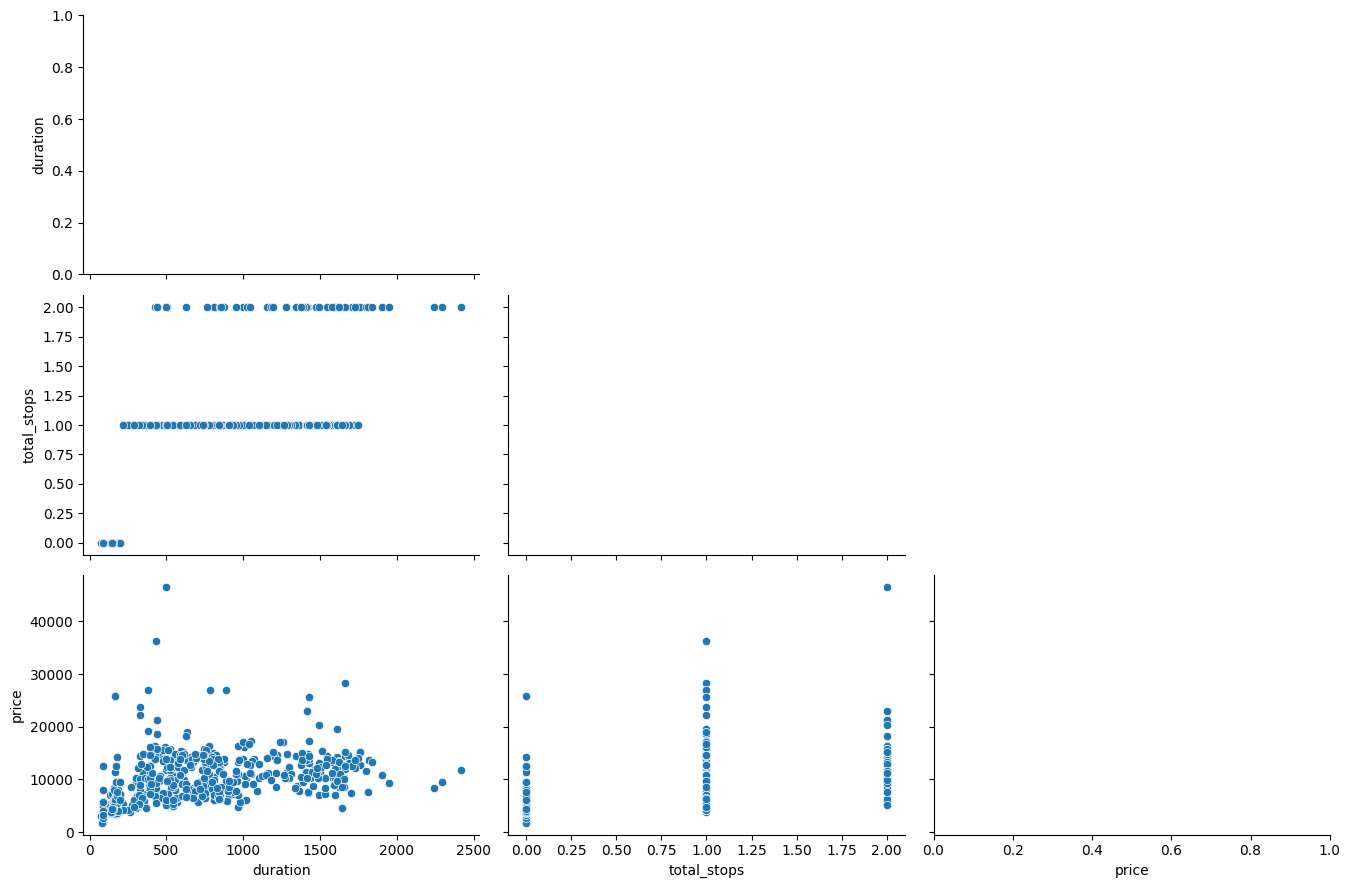

In [15]:
eda_helper_functions.pair_plots(t_data)

### 7. Correlation Analysis

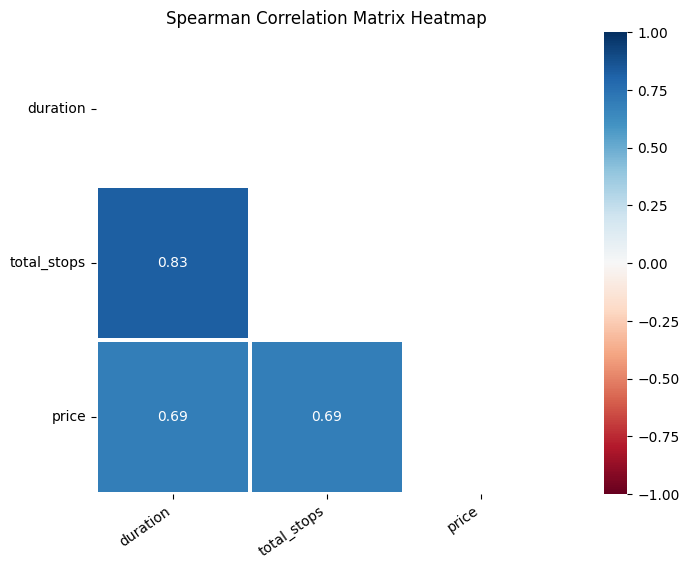

In [16]:
eda_helper_functions.correlation_heatmap(t_data)

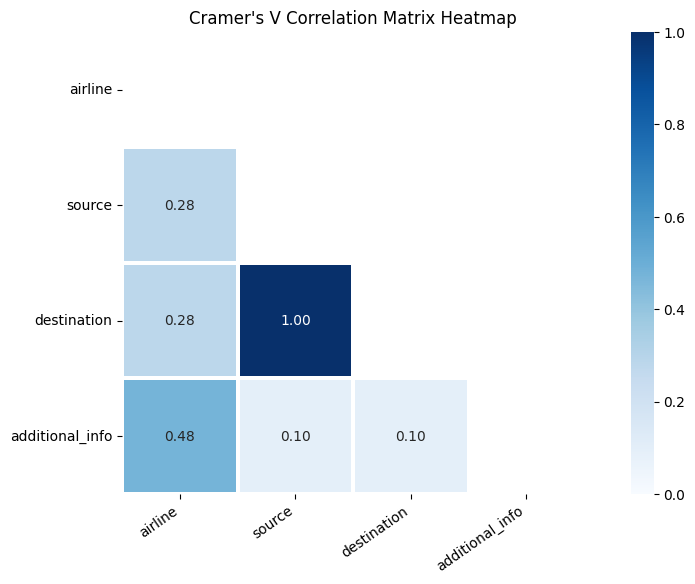

In [17]:
eda_helper_functions.cramersV_heatmap(t_data)

### 8. Detailed Analysis

In [18]:
t_data.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

In [19]:
eda_helper_functions.cat_summary(t_data,'airline')

0            Jet Airways
1            Jet Airways
2            Jet Airways
3            Jet Airways
4      Multiple Carriers
             ...        
635    Multiple Carriers
636             Air Asia
637               Indigo
638               Indigo
639          Jet Airways
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,237


,count,percentage
category,,
Jet Airways,237,0.370312
Indigo,122,0.190625
Air India,112,0.175000
Multiple Carriers,74,0.115625
Spicejet,38,0.059375
Vistara,30,0.046875
Air Asia,14,0.021875
Goair,13,0.020313


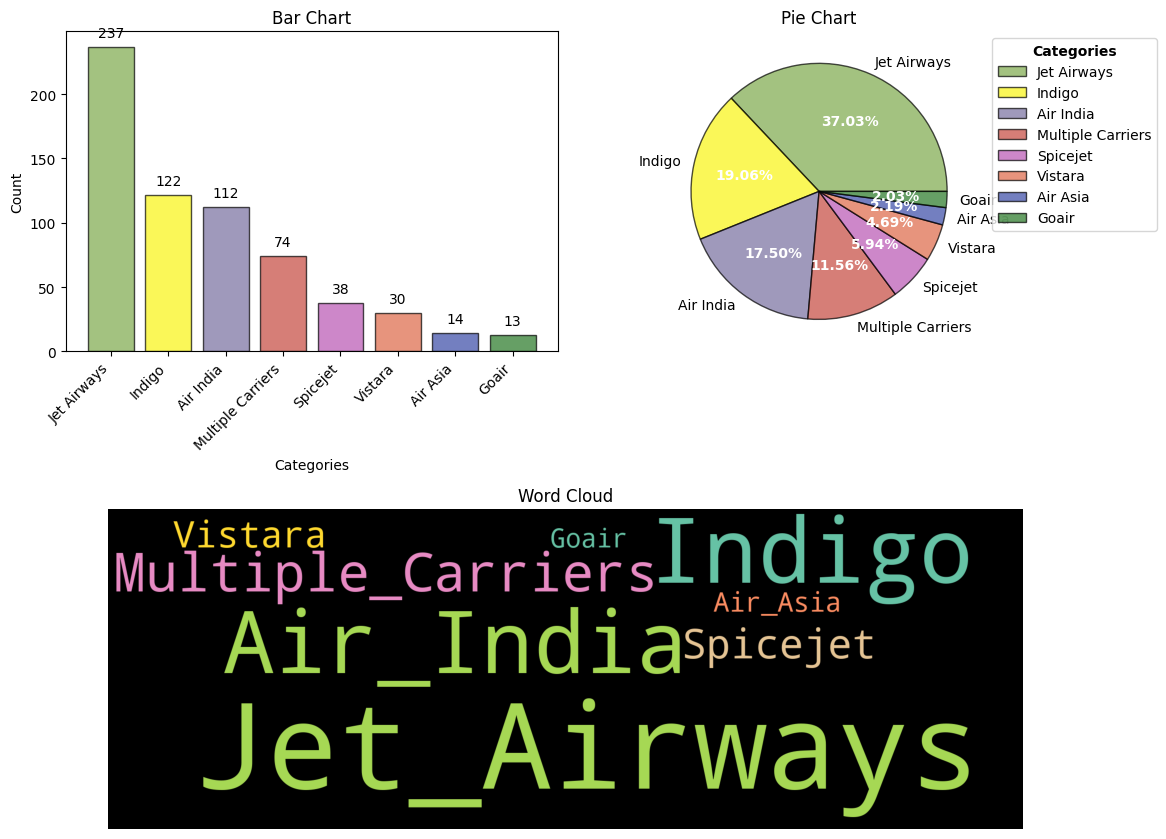

In [20]:
eda_helper_functions.cat_univar_plots(t_data,'airline')

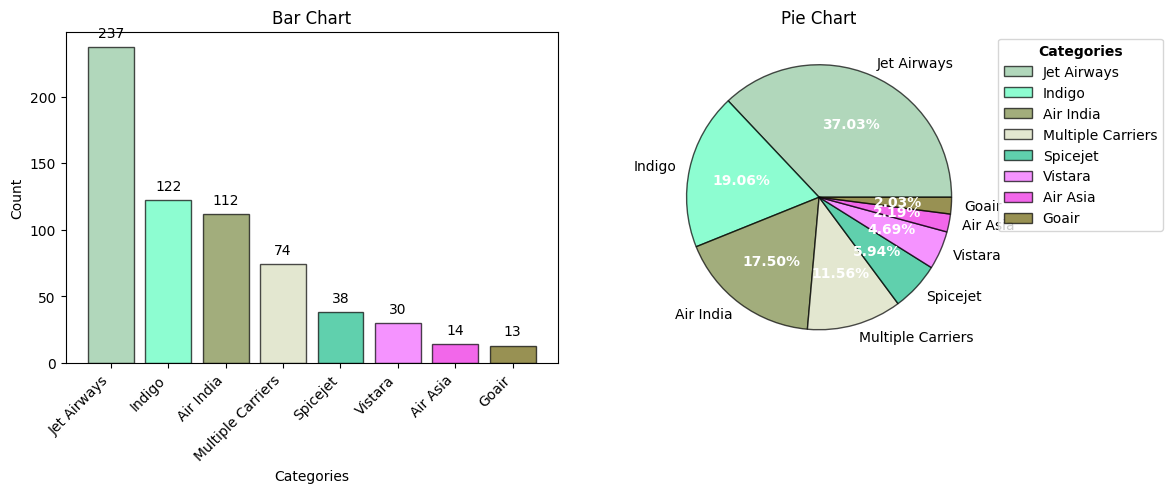

In [21]:
eda_helper_functions.cat_univar_plots(t_data,'airline',show_wordcloud=False)

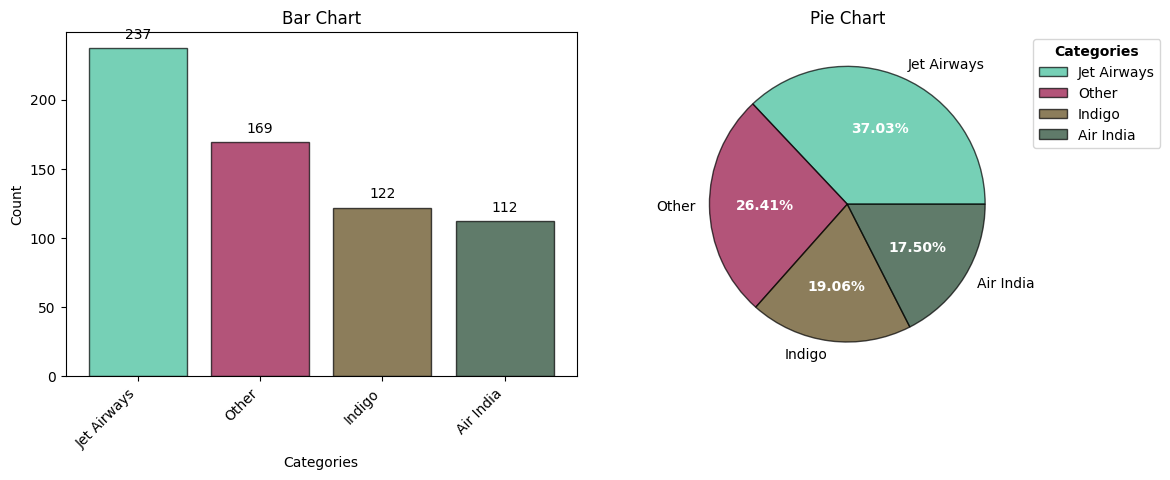

In [22]:
eda_helper_functions.cat_univar_plots(t_data,'airline',show_wordcloud=False,k=3)

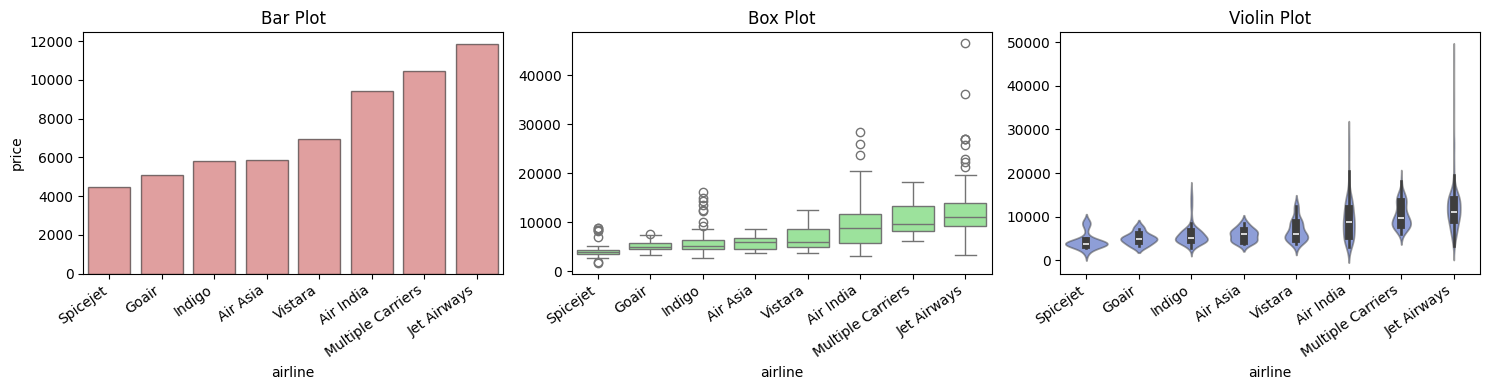

In [23]:
eda_helper_functions.num_cat_bivar_plots(
    data =t_data,
    num_var = "price",
    cat_var = "airline"
)

In [24]:
eda_helper_functions.num_cat_hyp_testing(t_data,"price","airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 43.596162943026876
- p-value              : 2.8450188615038253e-50
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 282.720069355512
- p-value              : 2.9515575391207617e-57
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


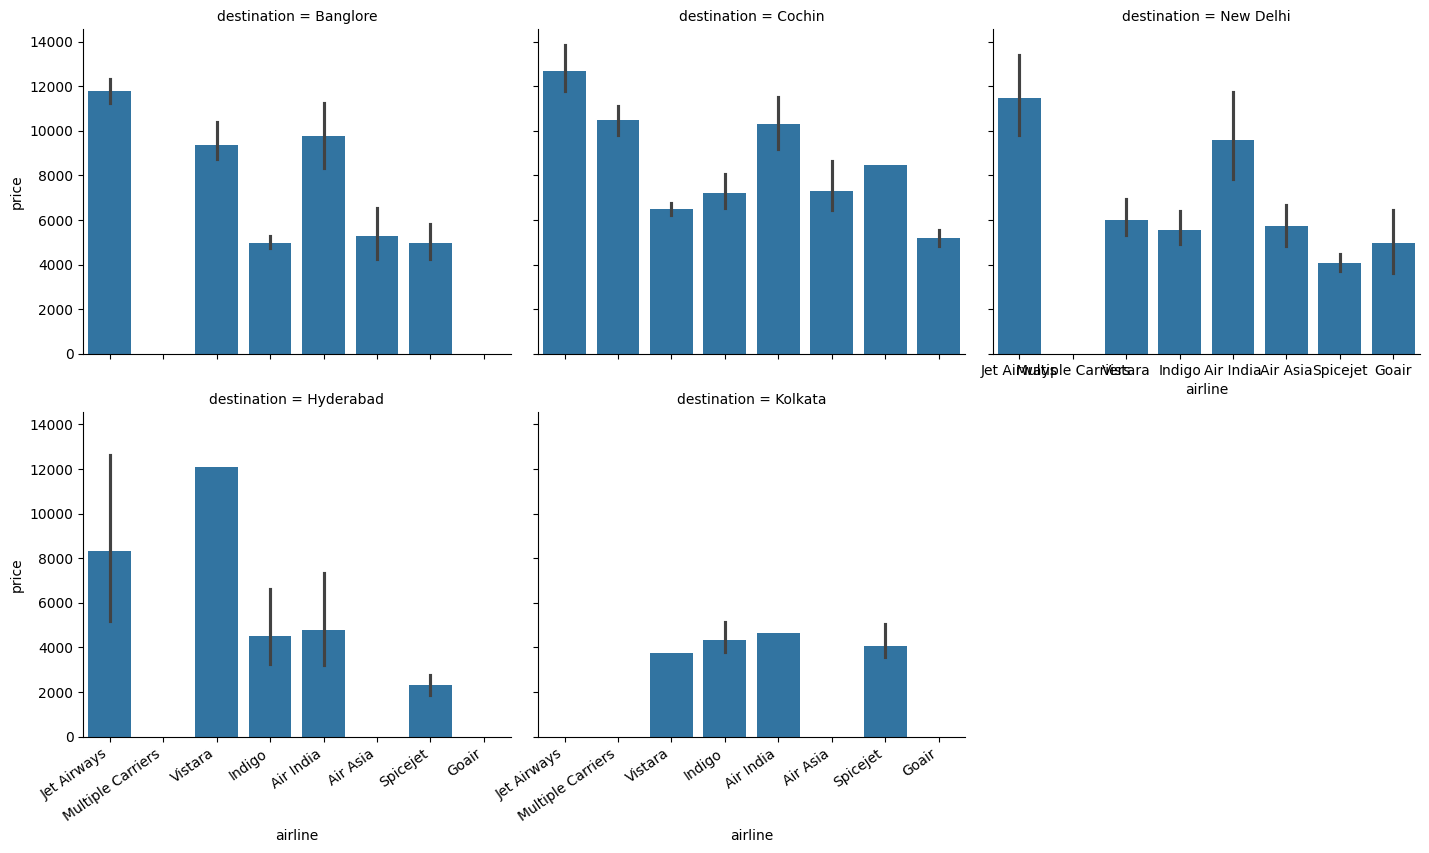

In [25]:
airline_grid = sns.FacetGrid(
    data = t_data,
    col='destination',
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True)
airline_grid.map(sns.barplot,"airline","price",order=training_data.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

### 8.2 date_of_journey

In [26]:
training_data.date_of_journey

0      2019-06-06
1      2019-06-09
2      2019-05-21
3      2019-03-18
4      2019-05-27
          ...    
635    2019-03-27
636    2019-03-18
637    2019-05-01
638    2019-05-01
639    2019-06-06
Name: date_of_journey, Length: 640, dtype: object

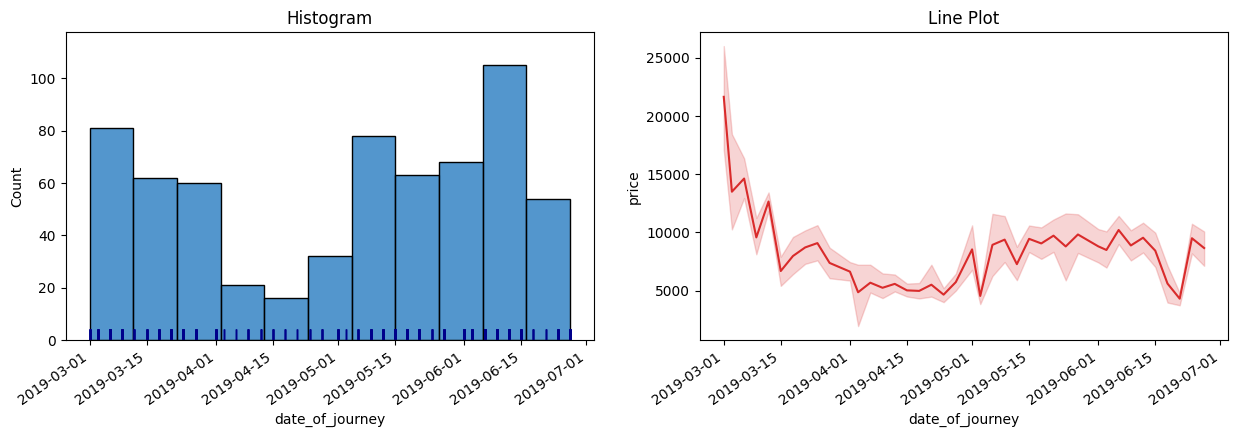

In [27]:
eda_helper_functions.dt_univar_plots(
    data=t_data,
    var="date_of_journey",
    target="price"
)

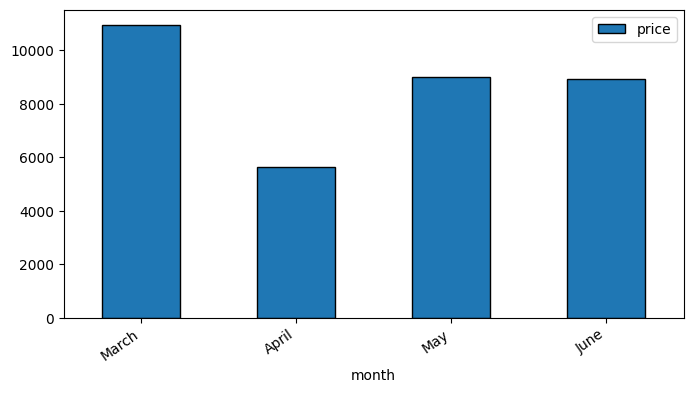

In [28]:
(
	t_data
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.pyplot.gca()
eda_helper_functions.rotate_xlabels(ax)

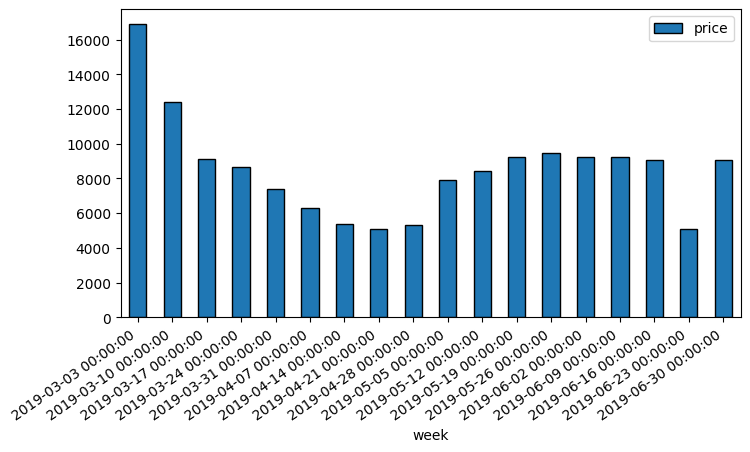

In [29]:
(
	t_data
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.pyplot.gca()
eda_helper_functions.rotate_xlabels(ax)

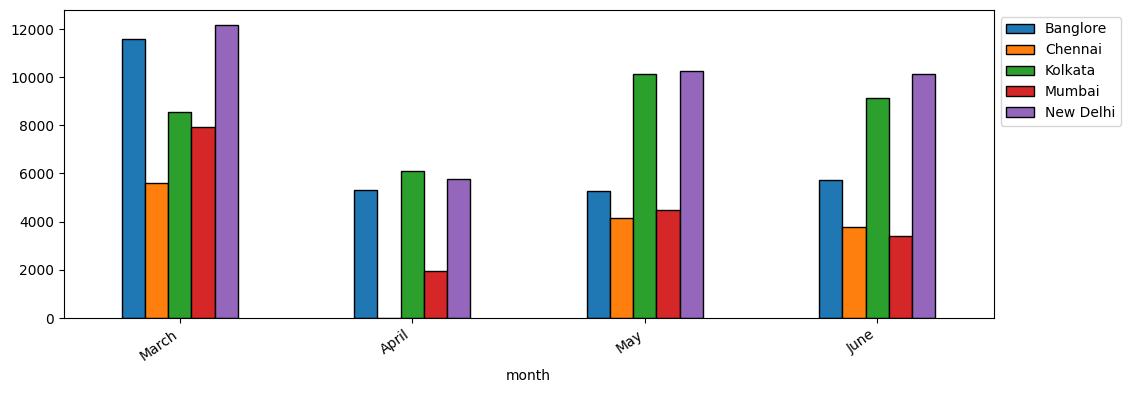

In [30]:
(
	t_data
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.pyplot.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

### 8.3 dep_time

In [31]:
t_data.dep_time

0     2025-04-09 08:25:00
1     2025-04-09 21:10:00
2     2025-04-09 21:50:00
3     2025-04-09 05:45:00
4     2025-04-09 07:10:00
              ...        
635   2025-04-09 07:00:00
636   2025-04-09 10:20:00
637   2025-04-09 15:15:00
638   2025-04-09 11:35:00
639   2025-04-09 08:25:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

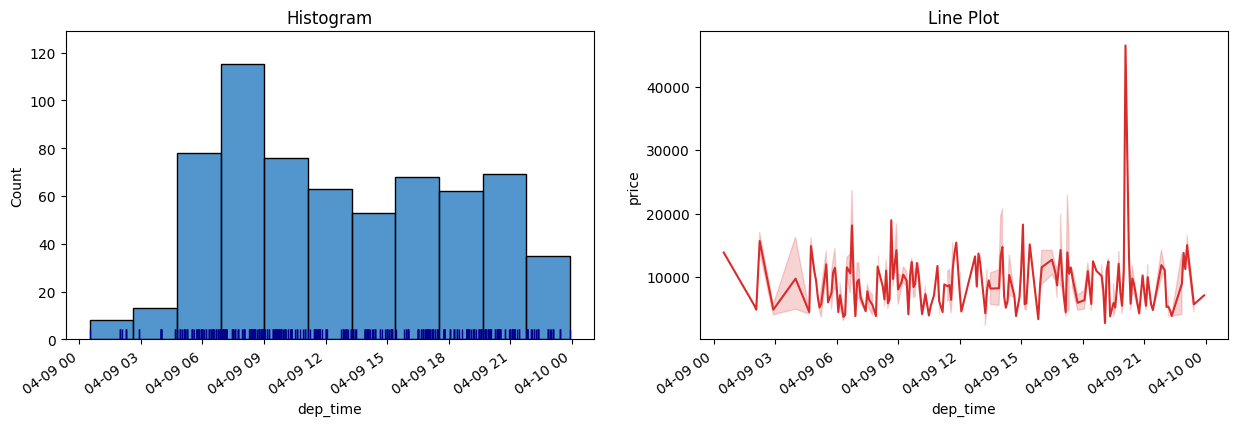

In [32]:
eda_helper_functions.dt_univar_plots(t_data, "dep_time", "price")

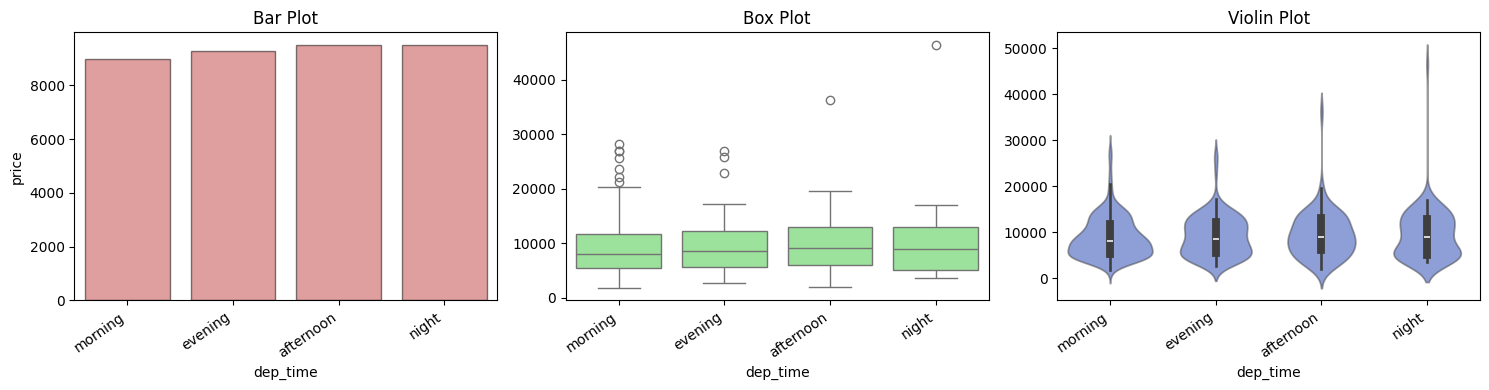

In [33]:

(
	t_data
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

### 8.4 duration

In [34]:
t_data.duration

0      1215
1       730
2       395
3       760
4       920
       ... 
635     840
636     155
637     290
638     145
639     740
Name: duration, Length: 640, dtype: int64

In [35]:
eda_helper_functions.num_summary(t_data, "duration")

0      1215
1       730
2       395
3       760
4       920
       ... 
635     840
636     155
637     290
638     145
639     740
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,135.00
10,150.00
25,170.00
50,497.50
75,951.25
90,1500.50
95,1630.50
99,1818.05


,value
mean,645.015625
trimmed mean (5%),612.769097
trimmed mean (10%),581.904297
median,497.500000


,value
var,267454.694591
std,517.160221
IQR,781.250000
mad,332.500000
coef_variance,0.801779


,value
skewness,0.863435
kurtosis,-0.328368


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 3.4535296760526914e-22
Test Statistic       : 0.8756798661375841
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 27.45578972963108
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [36]:
t_data.duration.quantile([0.25, 0.5, 0.75])

0.25    170.00
0.50    497.50
0.75    951.25
Name: duration, dtype: float64

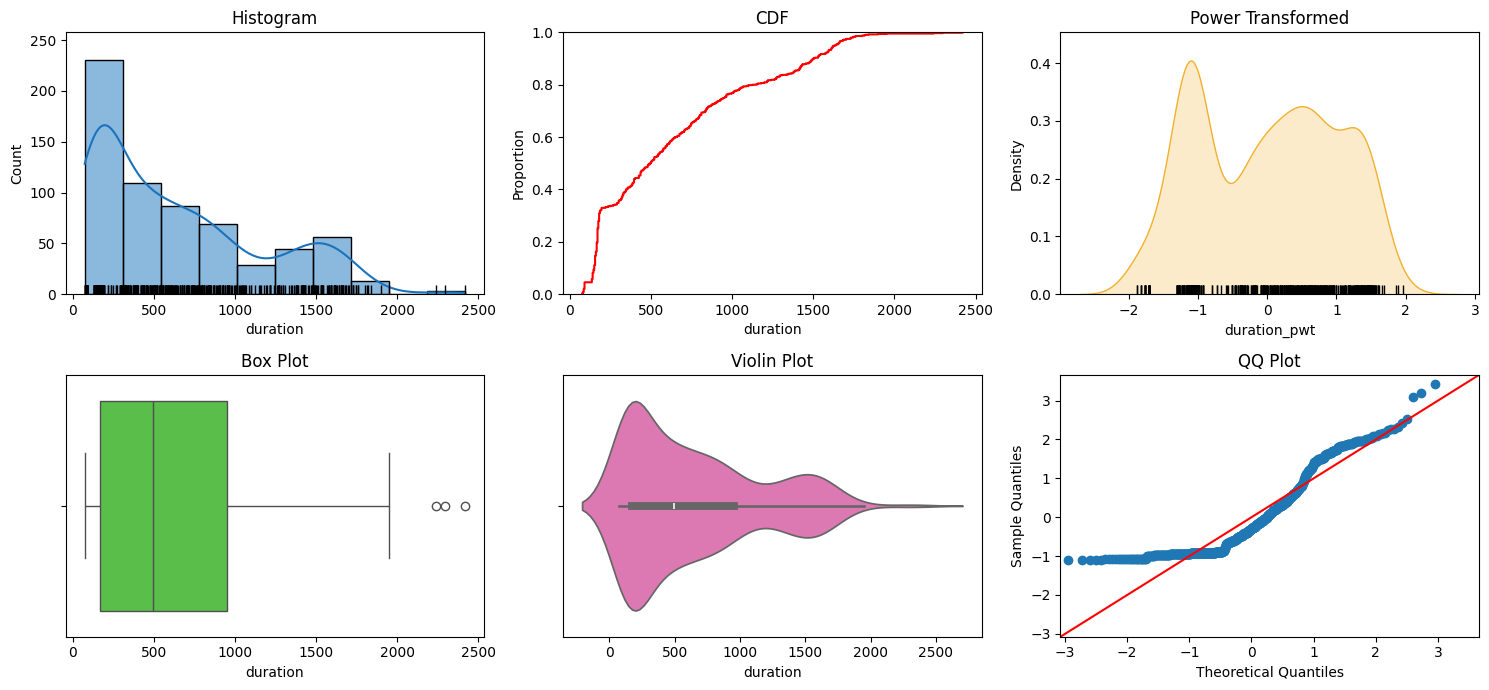

In [37]:
eda_helper_functions.num_univar_plots(t_data, "duration")

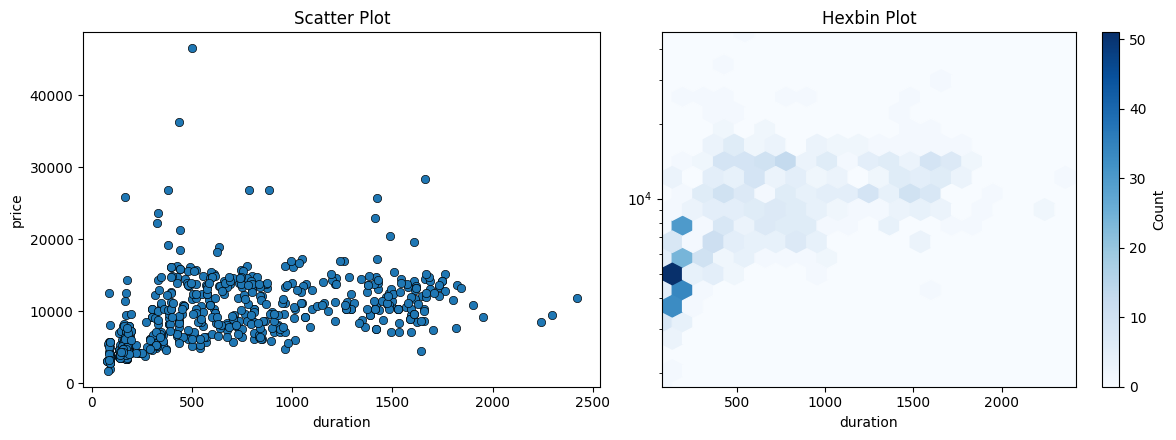

In [38]:

eda_helper_functions.num_bivar_plots(
	t_data,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [39]:
eda_helper_functions.num_num_hyp_testing(t_data, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.47791867872595833
- p-value              : 7.847580883431069e-38
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6947616430996296
- p-value              : 2.1995123061636275e-93
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


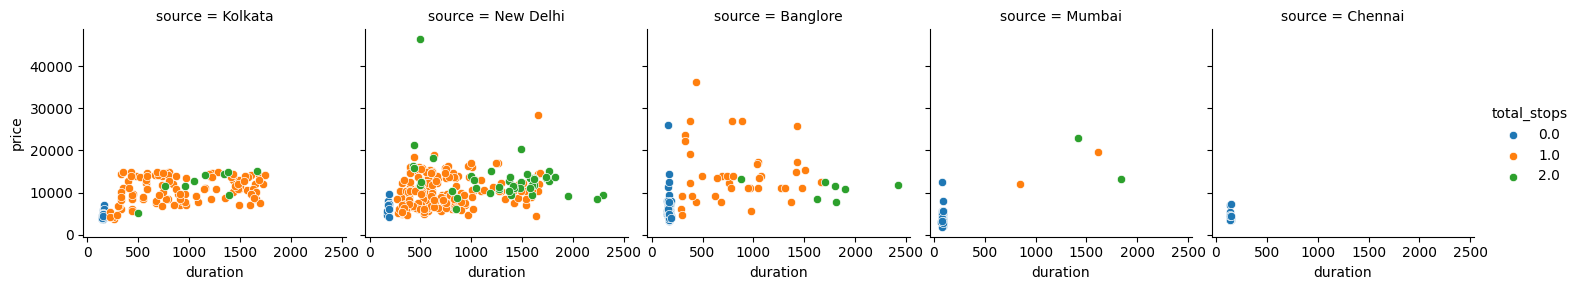

In [40]:
duration_grid = sns.FacetGrid(
	data=t_data,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

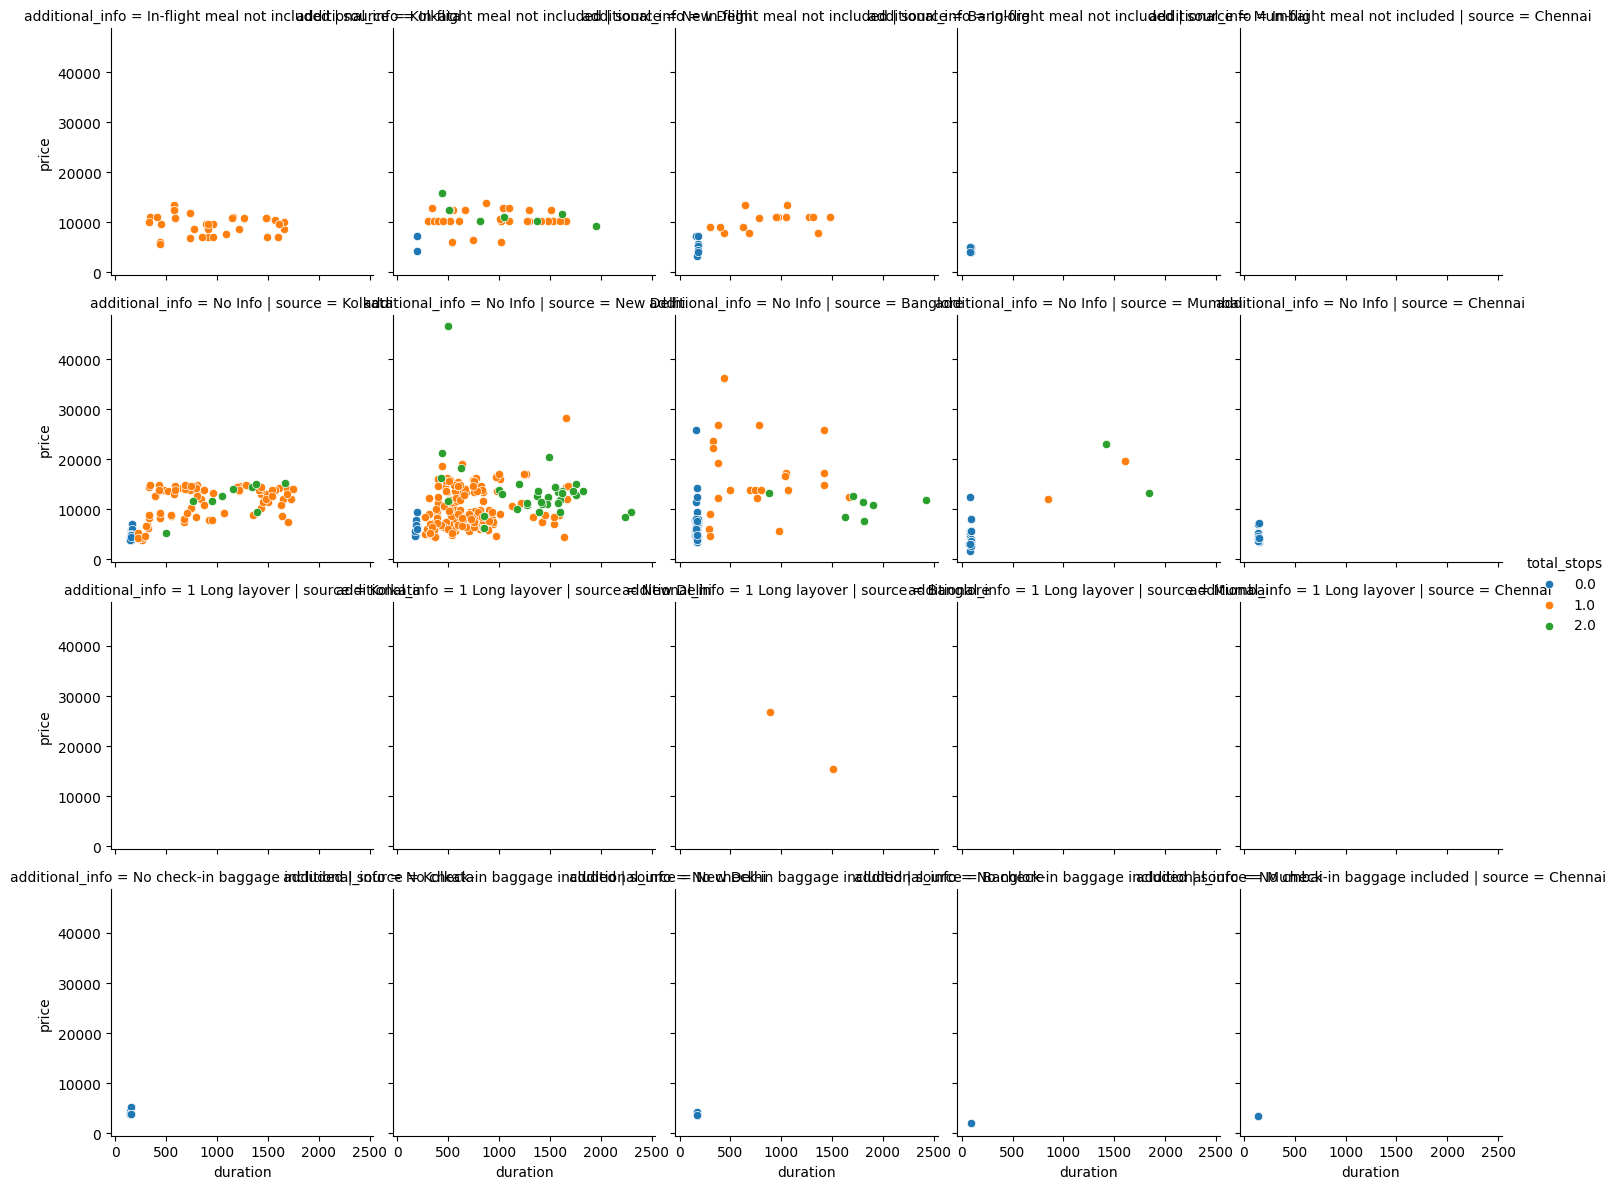

In [41]:
duration_grid = sns.FacetGrid(
	data=t_data,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [42]:
eda_helper_functions.get_iqr_outliers(t_data, "duration")

Lower Limit : -1001.875
Upper Limit : 2123.125


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
472,Air India,2019-03-27,New Delhi,Cochin,2025-04-09 05:55:00,2025-04-09 19:15:00,2240,2.0,No Info,8446
271,Air India,2019-06-12,New Delhi,Cochin,2025-04-09 05:00:00,2025-04-09 19:15:00,2295,2.0,No Info,9443
341,Air India,2019-03-03,Banglore,New Delhi,2025-04-09 05:50:00,2025-04-09 22:10:00,2420,2.0,No Info,11791


### 8.5 additional_info

In [43]:
eda_helper_functions.cat_summary(t_data, "additional_info")

0      In-flight meal not included
1      In-flight meal not included
2                          No Info
3                          No Info
4                          No Info
                  ...             
635                        No Info
636                        No Info
637                        No Info
638                        No Info
639                        No Info
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 4 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,4
top,No Info
freq,511


,count,percentage
category,,
No Info,511,0.798438
In-flight meal not included,113,0.176563
No check-in baggage included,14,0.021875
1 Long layover,2,0.003125


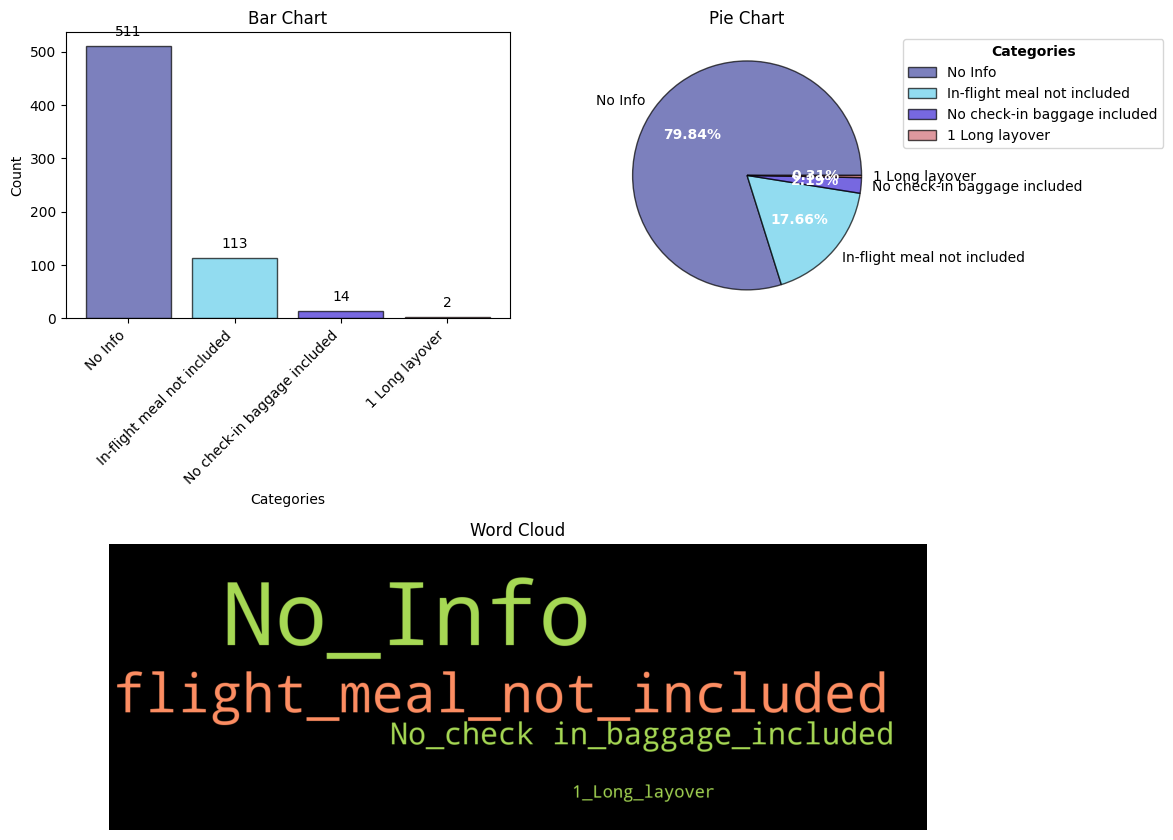

In [44]:

eda_helper_functions.cat_univar_plots(t_data, "additional_info")

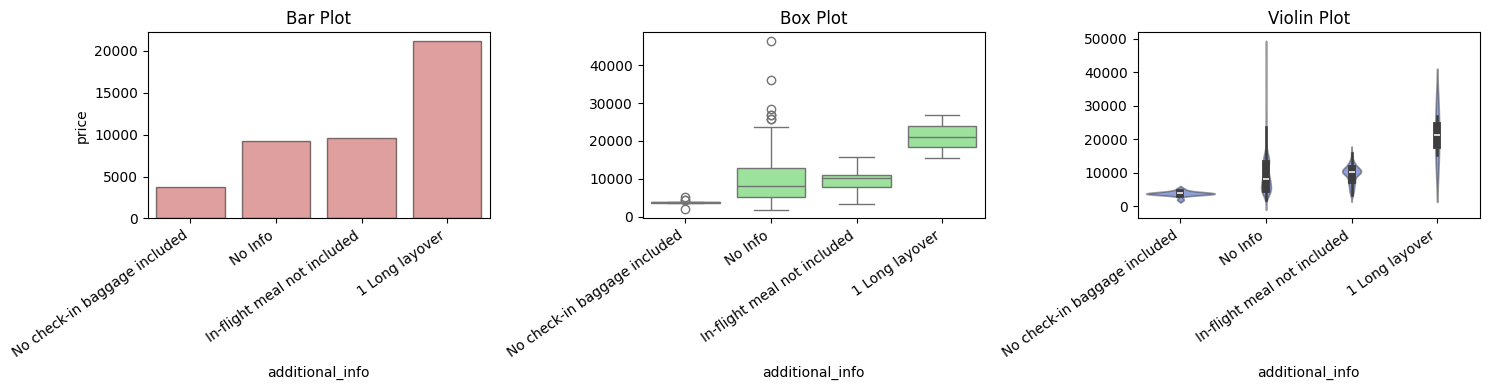

In [45]:
eda_helper_functions.num_cat_bivar_plots(t_data, "price", "additional_info")

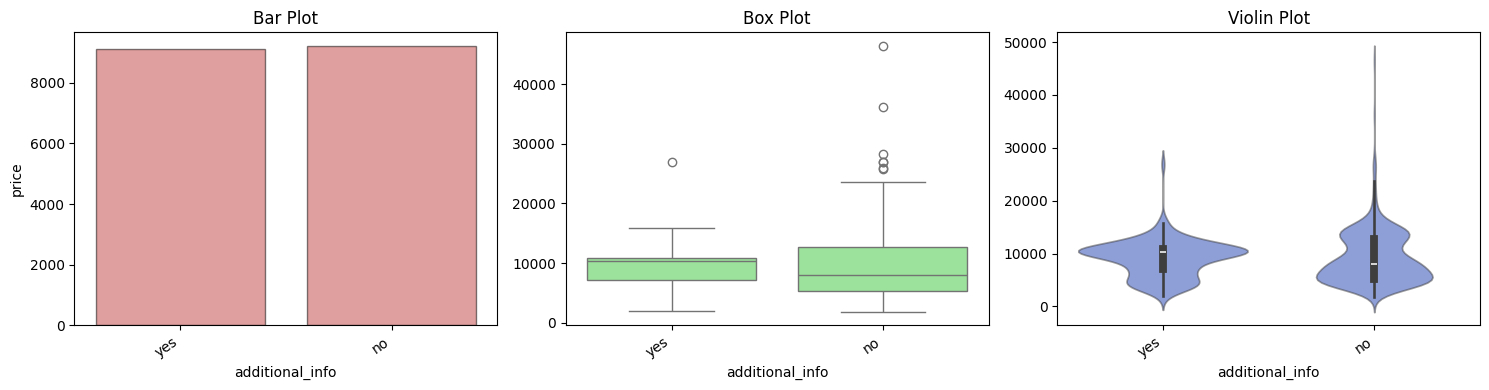

In [46]:
# convertion additional_info into a binary feature for analysis

(
	t_data
	.assign(additional_info=(
		t_data
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)

* additional_info has severely rare categories
* Converted it into a binary feature for further analysis

### 9. Automated EDA

In [47]:
# !pip install ydata-profiling

In [48]:
from ydata_profiling import ProfileReport

In [49]:
report = ProfileReport(t_data)

In [50]:
#report.to_file(output_file = "output.html")